# UCLA ITS Data Camp, Pre-Course Exercise
## Getting Data
By now you should have a good understanding of the basics of the Python programming language and be familiar with the following concepts:
- Core Object Types
- Variables
- Loops
- Conditionals
- Basic Functions
- Data Structures (lists, dictionaries, etc)

For the first activity, we will use this knowledge to practice the first step in any data project: acquiring data.

### Course Exercise Format
Course **lectures** will consist of complete notebooks that we step through together as a class to understand how different inputs produce different outputs. Course **exercises** will consist of incomplete notebooks that you will complete on your own (you may ask others / myself for hints if you get stumped). 

The part of each exercise that needs to be completed will be marked with a `TODO` comment. If there is no `TODO`, then you should be able to run the cell without making any changes. For example, in the first code cell below, you will see that the csv library has already been imported for you; there is no `TODO` above the `import` line. However, the `TODO` two lines below specifies that you will need to complete the code to import each collision table using the [csv](https://docs.python.org/3/library/csv.html) library.

### Loading Data from Text Files
One of the most common ways to bring data into your project is by reading in plain-text files. Let's practice downloading data and opening it using Python's built-in `csv` module.

##### Step 1: Create a Project Directory
Create a basic project directory structure, similar to what was described in "Considerations for Data Projects", and have this notebook reside in the top-level, like this:

```
pre-course-prj/                     
├── data/                        
├── output/                      
└── Pre-Course Activity.ipynb    
```
##### Step 2: Download Collisions from LA City's GeoHub
The City of Los Angeles has an Open Data Portal specifically focused on spatial datasets, the GeoHub. As part of the City's initiative to end traffic deaths, called [Vision Zero](http://visionzero.lacity.org/), it recently posted updated data on traffic collisions within City boundaries. 

1. Go to each of the following links for collision data between 2009 and 2013: [Collisions](http://visionzero.geohub.lacity.org/datasets/ladot::collisions-2009-2013-switrs), [Parties](http://visionzero.geohub.lacity.org/datasets/ladot::party-tables-collisions-2009-2013-switrs), and [Victims](http://visionzero.geohub.lacity.org/datasets/ladot::victim-tables-collisions-2009-2013-switrs).

2. For each data source, click on "Download" and then "Spreadsheet."

3. Put all three collision layers into the "data" folder.

##### Step 3: Read-in the Collision Data

In [3]:
# Import packages
import csv
import pandas as pd

# TODO: Read in collision data (all 3 CSV tables)
collisions = pd.read_csv('data/Collisions_20092013_SWITRS.csv')
parties = pd.read_csv('data/Party_Tables__Collisions_20092013_SWITRS.csv')
victims = pd.read_csv('data/Victim_Tables__Collisions_20092013_SWITRS.csv')

In [4]:
# TODO: Complete the function to return a record count for each table. Don't count the header row!
def record_count(my_list):
    return my_list.shape[0]

    
# Run record_count() on the three tables. Which has the most records?
collision_record_ct = record_count(collisions)
party_record_ct = record_count(parties)
victim_record_ct = record_count(victims)

# Print out the results. Which has the most records?
print(f"The collision table has {collision_record_ct} records.")
print(f"The party table has {party_record_ct} records.")
print(f"The victim table has {victim_record_ct} records.")

The collision table has 173714 records.
The party table has 937672 records.
The victim table has 576617 records.


In [5]:
collisions.shape

(173714, 89)

In [6]:
collision_record_ct

173714

### Loading Data from Python Packages
Another method for obtaining data is through Python packages themselves. 

##### Step 1: Install package (if needed)
Let's get [OpenStreetMap](https://www.openstreetmap.org) network data using Geoff Boeing's wonderful [osmnx](https://github.com/gboeing/osmnx) package. However, before we start, we are going to need to install `osmnx` since it is not included in either the Python standard library nor within the Anaconda distribution of Python. 

_Note: Following the conda ox environment instructions on the osmnx page you will likely get an error with the gdal installation as a result of a recent change in the build. Follow the instructions below to get a successful setup_

1. Open the Anaconda Prompt
2. Install geopandas (it contains all the same dependencies) via `conda install -c conda-forge geopandas`
3. Install osmnx via pip (since we have already installed the dependencies) via `python -m pip install osmnx`

You should now be able to run the code below successfully without GDAL setup errors.


##### Step 2: Import package within project
Although we have installed the python package, we cannot yet use it until we import it within our project's environment. You can confirm the installation is successful by running the cells below to import the package. _A note about importing packages: You only need to import the python package once each time during each Python session. Once you close the notebook (and therefore shut down the python kernel), you will need to import the packages again the next time you start the notebook._

##### Step 3: Read Documentation for Specific Functions to download data
Once you've imported the package, check the package-specific documentation for how to download data. Let's start by getting some street network files for an area of your choosing by following the example [here](https://github.com/gboeing/osmnx-examples/blob/master/notebooks/02-example-osm-to-shapefile.ipynb). 

In [5]:
# TODO: Import the newly-installed osmnx package
import osmnx as ox
%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__

# TODO: Get some amount of data
# from some place name, create a GeoDataFrame containing the geometry of the place
city = ox.gdf_from_place('Santa Monica, California, USA')
city

,bbox_east,bbox_north,bbox_south,bbox_west,geometry,place_name
0,-118.443426,34.05056,33.966658,-118.553468,"POLYGON ((-118.5534678 33.9843349, -118.548415...","Santa Monica, Los Angeles County, California, USA"


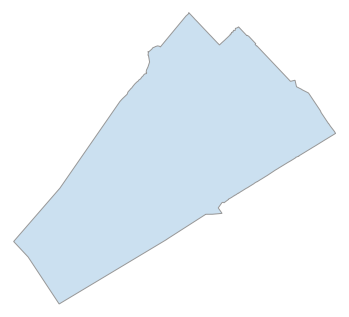

In [8]:
# save the retrieved data as a shapefile
ox.save_gdf_shapefile(city)

# project the geometry to the appropriate UTM zone (calculated automatically) then plot it
city = ox.project_gdf(city)
fig, ax = ox.plot_shape(city)

##### Step 4. Export as a shapefile to the 'output' project directory
The Shapefile format is one of the most common data formats for storing GIS data. Developed by ESRI, it is actually a collection of different files (usually about six) that contain the vector data, attribute infomation, projection, and other data. Take a look at [this notebook](https://github.com/gboeing/osmnx-examples/blob/master/notebooks/05-example-save-load-networks-shapes.ipynb) for an example of how to export data from osmnx to the Shapefile format for storage. Export the data you downloaded into the 'output' folder.

In [40]:
#creating directory 'output'

import os

path = 'output'

try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)

Successfully created the directory output 


In [9]:
# TODO: Export to disk as a shapefile into the 'output' folder
city.to_file('output/santa_monica')

##### Step 5. Confirm that you exported the shapefile correctly
There is an excellent website for quickly checking spatial data called [mapshaper](https://mapshaper.org/). If your file is not too big, try to view it here. Either drop your .shp file into the browser or use the file navigator in the window to point to your 'output' folder. 